In [1]:
import pandas as pd
import numpy as np

import os
import sys

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
datatrain = pd.read_csv("singer_dataset.csv")

In [3]:
datatrain

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,JasonChan-00001.wav,0.284613,0.038281,1750.852597,1944.482321,3535.628621,0.076364,-276.640230,121.354950,-4.232439,...,0.709386,-9.965440,-4.459773,-7.919014,-1.966714,-8.890683,1.093963,-8.597618,-2.935823,Jason Chan
1,JasonChan-00002.wav,0.273284,0.055548,1627.259978,1926.258529,3438.787539,0.069404,-227.677100,128.431980,-9.907826,...,1.674528,-2.481142,0.951706,-3.921206,-0.490400,-7.014960,-0.252197,-8.831158,-4.071356,Jason Chan
2,JasonChan-00003.wav,0.324700,0.040503,1571.674394,1823.492494,3168.530840,0.066317,-285.738340,130.345570,0.702650,...,1.022346,-7.031268,-2.235814,-2.952625,-1.394020,-6.592400,1.478372,-6.996587,-2.024768,Jason Chan
3,JasonChan-00004.wav,0.292200,0.052775,1739.092262,2007.784077,3735.935743,0.074873,-230.023100,121.089096,-9.479502,...,0.306354,-5.213098,0.367007,-2.599573,1.732301,-7.538789,0.807567,-6.642386,-2.014859,Jason Chan
4,JasonChan-00005.wav,0.269254,0.039379,1757.881505,1933.801266,3584.536658,0.077512,-282.762420,118.786730,-6.664371,...,-3.734363,-7.451644,-1.651254,-2.391947,-0.701486,-4.483365,2.099256,-6.249744,-0.612650,Jason Chan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,FionaFung-00013.wav,0.346810,0.202448,2426.116261,2645.149302,5315.834523,0.106319,-64.402016,84.732030,6.766001,...,4.862310,-0.624801,2.048581,-4.483855,-2.378722,-5.227857,-0.461419,-5.111421,1.890022,Fiona Fung
70,FionaFung-00014.wav,0.282627,0.228199,2507.687053,2800.792976,5562.466365,0.100835,-62.990090,88.939730,18.788599,...,-1.320141,-5.707506,0.182993,-5.874872,1.048444,-3.218314,1.142079,-0.532907,-0.236547,Fiona Fung
71,FionaFung-00015.wav,0.328370,0.226173,2807.109874,2925.074738,6250.528871,0.124951,-42.220432,73.274990,12.472406,...,4.600544,-2.085820,3.291731,-3.158022,2.370019,-5.305676,1.008226,-2.952543,-0.103381,Fiona Fung
72,FionaFung-00016.wav,0.343076,0.234732,2696.762686,2896.240185,6139.987872,0.116236,-14.454195,79.110115,7.757247,...,4.570812,-3.347389,2.990717,0.211602,4.581006,-6.637589,-0.499601,-3.242158,2.935136,Fiona Fung


In [4]:
datatrain = datatrain.set_index("filename")

In [5]:
datatrain.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.303379,0.164857,2154.548370,2452.429657,4626.276643,0.088096,-120.996501,100.929754,9.569747,23.659720,...,-6.370331,-1.075077,-4.776632,-1.038504,-3.876832,-0.798086,-5.967950,-0.473623,-3.213214,-0.738011
std,0.034417,0.070448,357.541222,281.785516,895.683784,0.020424,79.826536,15.030741,10.554673,8.817999,...,3.904958,4.494786,3.497400,3.072426,3.616893,3.375655,2.866297,3.316156,2.956812,2.961609
min,0.209195,0.038281,1451.711326,1823.492494,2918.257354,0.043431,-311.168240,73.274990,-11.840016,4.695354,...,-16.103243,-16.233068,-13.054051,-9.509819,-11.980173,-14.217737,-13.281610,-11.709548,-9.525517,-9.174238
25%,0.284834,0.117486,1867.302205,2289.055671,3905.434718,0.071656,-174.593810,89.193733,3.084044,16.633935,...,-9.874969,-2.442124,-7.374749,-2.829324,-5.831667,-2.036622,-7.560998,-1.863133,-5.026579,-2.281063
50%,0.304730,0.169336,2175.466836,2471.900058,4627.392852,0.088335,-101.969185,100.393665,9.110015,24.078750,...,-6.110416,-0.157165,-3.403489,-0.575789,-3.408830,-0.542863,-6.100359,0.161145,-2.767144,-0.612625
75%,0.330859,0.225472,2432.120350,2617.549844,5267.782730,0.103985,-57.929428,111.624845,16.126310,28.304494,...,-3.627784,1.895636,-2.184035,1.035667,-1.537982,1.495685,-4.123223,1.635599,-1.029546,1.129216
max,0.360414,0.291803,2807.109874,3053.737629,6704.451126,0.128252,-8.902014,139.512310,43.123997,46.071217,...,0.602697,5.007345,1.804571,4.526048,2.144839,5.301743,0.800076,4.954558,3.955843,4.769793


In [6]:
datatrain.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
filename,,,,,,,,,,,,,,,,,,,,,
JasonChan-00001.wav,0.284613,0.038281,1750.852597,1944.482321,3535.628621,0.076364,-276.64023,121.354950,-4.232439,28.340067,...,0.709386,-9.965440,-4.459773,-7.919014,-1.966714,-8.890683,1.093963,-8.597618,-2.935823,Jason Chan
JasonChan-00002.wav,0.273284,0.055548,1627.259978,1926.258529,3438.787539,0.069404,-227.67710,128.431980,-9.907826,29.028650,...,1.674528,-2.481142,0.951706,-3.921206,-0.490400,-7.014960,-0.252197,-8.831158,-4.071356,Jason Chan
JasonChan-00003.wav,0.324700,0.040503,1571.674394,1823.492494,3168.530840,0.066317,-285.73834,130.345570,0.702650,32.921635,...,1.022346,-7.031268,-2.235814,-2.952625,-1.394020,-6.592400,1.478372,-6.996587,-2.024768,Jason Chan
JasonChan-00004.wav,0.292200,0.052775,1739.092262,2007.784077,3735.935743,0.074873,-230.02310,121.089096,-9.479502,27.293053,...,0.306354,-5.213098,0.367007,-2.599573,1.732301,-7.538789,0.807567,-6.642386,-2.014859,Jason Chan
JasonChan-00005.wav,0.269254,0.039379,1757.881505,1933.801266,3584.536658,0.077512,-282.76242,118.786730,-6.664371,22.963093,...,-3.734363,-7.451644,-1.651254,-2.391947,-0.701486,-4.483365,2.099256,-6.249744,-0.612650,Jason Chan


In [7]:
X = datatrain.iloc[: ,:-1].values
Y = datatrain['label'].values

In [8]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [9]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y,  random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((55, 26), (55, 4), (19, 26), (19, 4))

In [10]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((55, 26), (55, 4), (19, 26), (19, 4))

In [11]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = x_train[0].shape))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13824     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 2

In [12]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= opt ,loss='categorical_crossentropy',metrics=['acc'])

In [13]:
checkpointer = ModelCheckpoint('SingerModel.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
# Train the model
history = model.fit(x_train, y_train, epochs=250, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 1.5126 - acc: 0.2364 - val_loss: 1.4305 - val_acc: 0.1053
Epoch 2/250
1/1 [==============================] - 0s 31ms/step - loss: 1.4686 - acc: 0.1818 - val_loss: 1.3782 - val_acc: 0.2105
Epoch 3/250
1/1 [==============================] - 0s 29ms/step - loss: 1.2915 - acc: 0.3818 - val_loss: 1.3298 - val_acc: 0.4211
Epoch 4/250
1/1 [==============================] - 0s 33ms/step - loss: 1.2453 - acc: 0.4182 - val_loss: 1.2928 - val_acc: 0.4737
Epoch 5/250
1/1 [==============================] - 0s 32ms/step - loss: 1.2208 - acc: 0.5273 - val_loss: 1.2624 - val_acc: 0.4737
Epoch 6/250
1/1 [==============================] - 0s 31ms/step - loss: 1.1811 - acc: 0.4182 - val_loss: 1.2348 - val_acc: 0.4737
Epoch 7/250
1/1 [==============================] - 0s 30ms/step - loss: 1.1181 - acc: 0.5818 - val_loss: 1.2063 - val_acc: 0.5789
Epoch 8/250
1/1 [==============================] - 0s 30ms/step - loss: 1.0574 - acc: 0.6364

In [17]:

# Save the model to a file
model.save('SingerModel.h5')



In [18]:
present_model = tf.keras.models.load_model('SingerModel.h5')
present_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13824     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 2

In [19]:
print("Accuracy of our model on test data : " , present_model.evaluate(x_test,y_test)[1]*100 , "%")

1/1 [==============================] - 0s 104ms/step - loss: 0.2392 - acc: 0.9474
Accuracy of our model on test data :  94.73684430122375 %


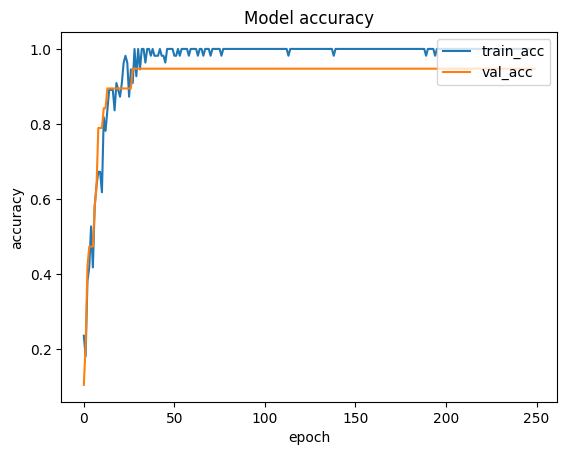

In [20]:
# plot the training artifacts
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

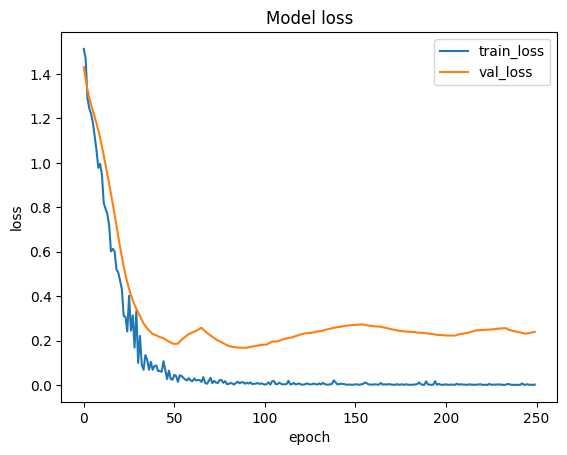

In [21]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [22]:
# predicting on test data.
pred_test = present_model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test_ = encoder.inverse_transform(y_test)

1/1 [==============================] - 0s 68ms/step


In [23]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_.flatten()

df.head(20)

,Predicted Labels,Actual Labels
0,Crystal Cheung,Crystal Cheung
1,Crystal Cheung,Crystal Cheung
2,Hins Cheung,Hins Cheung
3,Crystal Cheung,Crystal Cheung
4,Hins Cheung,Hins Cheung
5,Hins Cheung,Hins Cheung
6,Fiona Fung,Fiona Fung
7,Crystal Cheung,Crystal Cheung
8,Jason Chan,Hins Cheung
9,Jason Chan,Jason Chan
